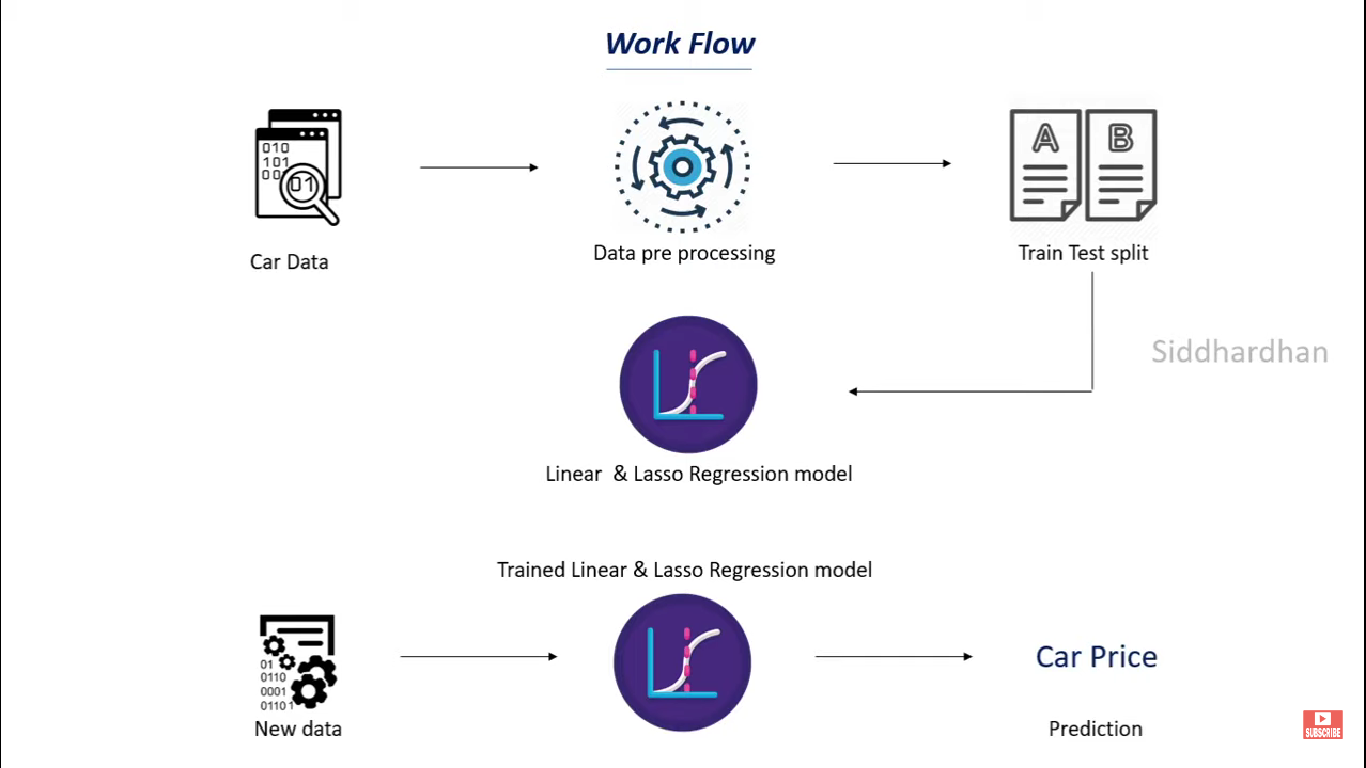

### Importing Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

### Data Analysis and Visualization

In [2]:
dataset = pd.read_csv('car data.csv')

In [3]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dataset.loc[dataset['Car_Name'].str.contains('verna')]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
215,verna,2012,4.50,9.4,36100,Petrol,Dealer,Manual,0
218,verna,2014,6.45,9.4,45078,Petrol,Dealer,Manual,0
219,verna,2012,4.50,9.4,36000,Petrol,Dealer,Manual,0
223,verna,2015,8.25,9.4,61381,Diesel,Dealer,Manual,0
224,verna,2013,5.11,9.4,36198,Petrol,Dealer,Automatic,0
228,verna,2012,4.95,9.4,60000,Diesel,Dealer,Manual,0
230,verna,2013,6.15,9.4,45000,Diesel,Dealer,Manual,0
231,verna,2017,9.25,9.4,15001,Petrol,Dealer,Manual,0
235,verna,2017,9.10,9.4,15141,Petrol,Dealer,Manual,0
238,verna,2013,4.80,9.4,60241,Petrol,Dealer,Manual,0


In [5]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
dataset.shape

(301, 9)

In [7]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
dataset['Fuel_Type'].value_counts(), dataset['Seller_Type'].value_counts(), dataset['Transmission'].value_counts()


(Petrol    239
 Diesel     60
 CNG         2
 Name: Fuel_Type, dtype: int64,
 Dealer        195
 Individual    106
 Name: Seller_Type, dtype: int64,
 Manual       261
 Automatic     40
 Name: Transmission, dtype: int64)

In [9]:
dataset['Fuel_Type'].replace({'Petrol':0, 'Diesel':1, 'CNG':2}, inplace=True)
dataset['Seller_Type'].replace({'Dealer':0, 'Individual':1}, inplace=True)
dataset['Transmission'].replace({'Manual':0, 'Automatic':1}, inplace=True)

In [10]:
X = dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = dataset['Selling_Price']
X,Y

(     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
 0    2014           5.59       27000          0            0             0   
 1    2013           9.54       43000          1            0             0   
 2    2017           9.85        6900          0            0             0   
 3    2011           4.15        5200          0            0             0   
 4    2014           6.87       42450          1            0             0   
 ..    ...            ...         ...        ...          ...           ...   
 296  2016          11.60       33988          1            0             0   
 297  2015           5.90       60000          0            0             0   
 298  2009          11.00       87934          0            0             0   
 299  2017          12.50        9000          1            0             0   
 300  2016           5.90        5464          0            0             0   
 
      Owner  
 0        0  
 1        0  
 2      

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

### 1. Linear Regression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
X_train_prediction = model.predict(X_train)

In [15]:
error_score = metrics.r2_score(X_train_prediction, Y_train)
error_score

0.8635655509199314

In [16]:
X_test_prediction = model.predict(X_test)

In [17]:
error_score_test = metrics.r2_score(X_test_prediction, Y_test)
error_score_testB

0.8062199941175402

In [18]:
new = [[2017, 7, 50000, 0, 0, 0, 0]]
model.predict(new)

C:\Users\nikun\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.5310865])

### 2. Lasso Regression

In [77]:
lass_reg_model = Lasso()

In [78]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [79]:
lass_train_prediction = lass_reg_model.predict(X_train)

In [80]:
error_score_lass_train =  metrics.r2_score(lass_train_prediction, Y_train)
error_score_lass_train

0.7984590240704248

In [81]:
lass_test_prediction = lass_reg_model.predict(X_test)

In [82]:
error_score_lass_test = metrics.r2_score(lass_test_prediction, Y_test)
error_score_lass_test

0.7711110403265475